<a href="https://colab.research.google.com/github/akitim/SkillFactory_current/blob/main/Unit_7_Basic_ML_algorithms_part_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Юнит 7. Основные алгоритмы машинного обучения. Часть II


## ML-5. Решающие деревья и случайный лес


### 5.2. Решающие деревья

#### Задание 5.2.3
Обучите на предложенных данных решающее дерево. Целевой переменной здесь является переменная `Class`. Размер тестовой выборки возьмите за ` 0.2, random_state = 17` для разбиения и дерева. Максимальную глубину дерева примите за **3**, максимальное число признаков, по которым ищется лучшее разбиение в дереве — за **2**. Какое значение $\ F1-score $ вы получили? Округлите до трёх знаков после точки-разделителя.

In [2]:
import pandas as pd
import numpy as np

path = 'https://raw.githubusercontent.com/akitim/datasets/main/bill_authentication.csv'
df = pd.read_csv(path)
df.sample(5)

,Variance,Skewness,Curtosis,Entropy,Class
465,-2.69890,12.198400,0.67661,-8.548200,0
809,-1.70150,-0.010356,-0.99337,-0.531040,1
446,2.45270,2.965300,0.20021,-0.056479,0
1220,-2.77690,-5.696700,5.91790,0.376710,1
406,0.14783,7.946000,1.07420,-3.340900,0


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

RND_SEED = 17

X = df.drop('Class', axis=1).values
Y = df['Class'].values

X_train, X_test, Y_train, Y_test =\
    train_test_split(X, Y, test_size= 0.2, random_state=RND_SEED)

clf_tree = DecisionTreeClassifier(criterion='gini',
                                  max_depth=3,
                                  max_features=2,
                                  random_state=RND_SEED)

clf_tree.fit(X_train, Y_train)

from sklearn.metrics import f1_score

Y_pred = clf_tree.predict(X_test)
print ('f1_score = ', round(f1_score (Y_test, Y_pred), 3))

f1_score =  0.866


#### Задание 5.2.4

Проклассифицируйте банкноту с вектором признаков `2.04378, -0.38422, 1.437292, 0.76421`. К какому классу она относится?

In [48]:
banknote_sample = np.array([2.04378, -0.38422, 1.437292, 0.76421]).reshape(1, -1)
print ('Предсказанный класс банкноты [2.04378, -0.38422, 1.437292, 0.76421]:',
       clf_tree.predict(banknote_sample)[0])

Предсказанный класс банкноты [2.04378, -0.38422, 1.437292, 0.76421]: 0


#### ПРИМЕР

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                       np.arange(y_min, y_max, 0.01))

train_data, train_labels = make_blobs(n_samples=100, centers=[(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(5,5))


clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)

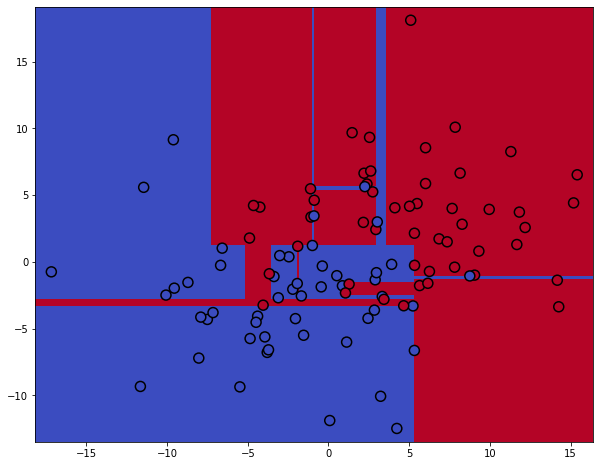

In [2]:
plt.figure(figsize = (10, 8))
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);